# Logical model to understand the crypto world

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import ast
import matplotlib.colors as mcolors
import matplotlib.cm as cm

## Loading full crypto information after preprocessing

In [2]:
df = pd.read_csv('../data/csv/crypto_final.csv')
print(df.shape)
df.head()

(1000, 27)


id                                   name  symbol  \
0   6535                          NEAR Protocol    NEAR   
1   8916                      Internet Computer     ICP   
2   3773  Artificial Superintelligence Alliance     FET   
3  22974                              Bittensor     TAO   
4   5690                                 Render  RENDER   

                                    slug  num_market_pairs  \
0                          near-protocol               443   
1                      internet-computer               291   
2  artificial-superintelligence-alliance               370   
3                              bittensor                86   
4                                 render               465   

                 date_added  \
0  2020-08-11T00:00:00.000Z   
1  2021-03-23T00:00:00.000Z   
2  2019-03-02T00:00:00.000Z   
3  2023-03-06T05:20:00.000Z   
4  2020-06-11T00:00:00.000Z   

                                                tags  circulating_supply  \
0  platform,ai-big-data,staking,coinbase-ventures...        1.123916e+09   
1  platform,ai-big-data,smart-contracts,polychain...        4.698829e+08   
2  cosmos-ecosystem,ai-big-data,collectibles-nfts...        2.520000e+09   
3  ai-big-data,distributed-computing,oracles,dao,...        7.365602e+06   
4  art,media,vr-ar,ai-big-data,distributed-comput...        3.924605e+08   

   total_supply       price  ...  \
0  1.209633e+09    4.001789  ...   
1  5.223637e+08    7.984759  ...   
2  2.630547e+09    1.298860  ...   
3  7.365602e+06  277.748222  ...   
4  5.322208e+08    5.157754  ...   

                                       exchange_name  \
0  ['Binance', 'DOEX', 'BTCC', 'Bybit', 'DigiFine...   
1  ['Binance', 'BTCC', 'Bybit', 'CoinUp.io', 'Dig...   
2  ['Binance', 'DOEX', 'BTCC', 'Zedcex Exchange',...   
3  ['Binance', 'Bybit', 'KCEX', 'LBank', 'Toobit'...   
4  ['Binance', 'Bybit', 'KCEX', 'OKX', 'LBank', '...   

                                       exchange_slug  total_weekly_visits  \
0  ['binance', 'doex', 'btcc', 'bybit', 'digifine...         8.992929e+07   
1  ['binance', 'btcc', 'bybit', 'coinup-io', 'dig...         7.725172e+07   
2  ['binance', 'doex', 'btcc', 'zedcex-exchange',...         8.521125e+07   
3  ['binance', 'bybit', 'kcex', 'lbank', 'toobit'...         6.015005e+07   
4  ['binance', 'bybit', 'kcex', 'okx', 'lbank', '...         5.779923e+07   

   average_weekly_visits  max_weekly_visits min_weekly_visits  \
0           5.839564e+05         10403969.0              44.0   
1           7.500167e+05         10403969.0              44.0   
2           7.746477e+05         10403969.0              44.0   
3           1.074108e+06         10403969.0              44.0   
4           9.174480e+05         10403969.0             164.0   

  total_spot_volume_usd average_spot_volume_usd max_spot_volume_usd  \
0          5.948207e+10            3.862472e+08        7.843064e+09   
1          5.031126e+10            4.884588e+08        7.843064e+09   
2          5.297546e+10            4.815951e+08        7.843064e+09   
3          3.506895e+10            6.262312e+08        7.843064e+09   
4          3.065394e+10            4.865705e+08        7.843064e+09   

   min_spot_volume_usd  
0             0.000000  
1             0.000000  
2             0.000000  
3         39184.359981  
4         15071.766165  

[5 rows x 27 columns]

## Subsets

### Cryptos with its exchange lists

In [3]:
crypto_exchange_cols = [
    'id',
    'name',
    'symbol',
    'num_market_pairs', 
    'price',
    'volume_24h',
    'market_cap',
    'category',
    'exchange_id',
    'total_weekly_visits',
    'average_weekly_visits',
    'max_weekly_visits',
    'min_weekly_visits',
    'total_spot_volume_usd',
    'average_spot_volume_usd',
    'max_spot_volume_usd',
    'min_spot_volume_usd'
    ]
crypto_exchange_df = df[crypto_exchange_cols]

crypto_exchange_df.head()

id                                   name  symbol  num_market_pairs  \
0   6535                          NEAR Protocol    NEAR               443   
1   8916                      Internet Computer     ICP               291   
2   3773  Artificial Superintelligence Alliance     FET               370   
3  22974                              Bittensor     TAO                86   
4   5690                                 Render  RENDER               465   

        price    volume_24h    market_cap category  \
0    4.001789  1.896790e+08  4.497676e+09       AI   
1    7.984759  6.524906e+07  3.751901e+09       AI   
2    1.298860  2.768840e+08  3.273126e+09       AI   
3  277.748222  6.626699e+07  2.045783e+09       AI   
4    5.157754  8.485562e+07  2.024215e+09       AI   

                                         exchange_id  total_weekly_visits  \
0  [270, 7680, 21, 521, 407, 1188, 9867, 294, 333...         8.992929e+07   
1  [270, 21, 521, 10361, 407, 1188, 9867, 294, 33...         7.725172e+07   
2  [270, 7680, 21, 9200, 521, 10361, 407, 1188, 9...         8.521125e+07   
3  [270, 521, 9867, 333, 6137, 513, 943, 1653, 57...         6.015005e+07   
4  [270, 521, 9867, 294, 333, 6137, 513, 943, 929...         5.779923e+07   

   average_weekly_visits  max_weekly_visits  min_weekly_visits  \
0           5.839564e+05         10403969.0               44.0   
1           7.500167e+05         10403969.0               44.0   
2           7.746477e+05         10403969.0               44.0   
3           1.074108e+06         10403969.0               44.0   
4           9.174480e+05         10403969.0              164.0   

   total_spot_volume_usd  average_spot_volume_usd  max_spot_volume_usd  \
0           5.948207e+10             3.862472e+08         7.843064e+09   
1           5.031126e+10             4.884588e+08         7.843064e+09   
2           5.297546e+10             4.815951e+08         7.843064e+09   
3           3.506895e+10             6.262312e+08         7.843064e+09   
4           3.065394e+10             4.865705e+08         7.843064e+09   

   min_spot_volume_usd  
0             0.000000  
1             0.000000  
2             0.000000  
3         39184.359981  
4         15071.766165

In [4]:
crypto_exchange_df.describe().T

count          mean           std           min  \
id                       1000.0  2.043878e+04  1.041534e+04  1.000000e+00   
num_market_pairs         1000.0  2.046410e+02  3.178094e+03  1.000000e+00   
price                    1000.0  6.455867e+01  1.815352e+03  3.291000e-21   
volume_24h               1000.0  1.317790e+08  2.147480e+09  0.000000e+00   
market_cap               1000.0  1.942201e+09  3.724345e+10  0.000000e+00   
total_weekly_visits      1000.0  1.709720e+07  2.341853e+07  0.000000e+00   
average_weekly_visits    1000.0  1.446972e+06  1.303999e+06  0.000000e+00   
max_weekly_visits        1000.0  4.303202e+06  3.239856e+06  0.000000e+00   
min_weekly_visits        1000.0  3.840459e+05  1.114142e+06  0.000000e+00   
total_spot_volume_usd    1000.0  8.675266e+09  1.559108e+10  0.000000e+00   
average_spot_volume_usd  1000.0  4.528233e+08  3.216846e+08  0.000000e+00   
max_spot_volume_usd      1000.0  1.863302e+09  2.373736e+09  0.000000e+00   
min_spot_volume_usd      1000.0  1.017159e+08  2.430065e+08  0.000000e+00   

                                  25%           50%           75%  \
id                       1.040850e+04  2.365950e+04  2.981675e+04   
num_market_pairs         7.000000e+00  1.800000e+01  4.600000e+01   
price                    1.912615e-04  4.231241e-03  7.215153e-02   
volume_24h               2.308008e+03  1.116638e+05  1.258062e+06   
market_cap               0.000000e+00  1.512615e+06  2.354266e+07   
total_weekly_visits      6.243210e+05  7.825504e+06  2.087530e+07   
average_weekly_visits    2.781472e+05  1.232157e+06  2.030374e+06   
max_weekly_visits        3.616000e+05  5.002908e+06  5.665954e+06   
min_weekly_visits        2.180000e+02  3.676900e+04  2.259520e+05   
total_spot_volume_usd    3.858311e+08  1.971617e+09  7.401365e+09   
average_spot_volume_usd  1.286104e+08  4.769786e+08  6.686754e+08   
max_spot_volume_usd      1.852463e+08  9.496146e+08  2.367336e+09   
min_spot_volume_usd      7.805755e+04  1.016103e+07  6.879362e+07   

                                  max  
id                       3.290200e+04  
num_market_pairs         9.689500e+04  
price                    5.733705e+04  
volume_24h               5.410084e+10  
market_cap               1.132571e+12  
total_weekly_visits      1.021447e+08  
average_weekly_visits    5.665954e+06  
max_weekly_visits        1.040397e+07  
min_weekly_visits        5.665954e+06  
total_spot_volume_usd    8.055538e+10  
average_spot_volume_usd  2.681298e+09  
max_spot_volume_usd      7.843064e+09  
min_spot_volume_usd      2.681298e+09

In [5]:
crypto_exchange_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1000 non-null   int64  
 1   name                     1000 non-null   object 
 2   symbol                   1000 non-null   object 
 3   num_market_pairs         1000 non-null   int64  
 4   price                    1000 non-null   float64
 5   volume_24h               1000 non-null   float64
 6   market_cap               1000 non-null   float64
 7   category                 1000 non-null   object 
 8   exchange_id              1000 non-null   object 
 9   total_weekly_visits      1000 non-null   float64
 10  average_weekly_visits    1000 non-null   float64
 11  max_weekly_visits        1000 non-null   float64
 12  min_weekly_visits        1000 non-null   float64
 13  total_spot_volume_usd    1000 non-null   float64
 14  average_spot_volume_usd  

#### Getting the exchanges' ID's

In [6]:
# Convert each string in the 'exchange_id' column to a list
crypto_exchange_df.loc[:, 'exchange_id'] = crypto_exchange_df['exchange_id'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [7]:
# Concat all lists of exchanges
exchange_ids_list = np.concatenate(crypto_exchange_df['exchange_id'].values.reshape(-1, 1))

# Flatten the list of lists
flattened_exchange_ids = [item for sublist in exchange_ids_list for item in sublist]

# Keeping the unique values
unique_exchanges_ids = set(flattened_exchange_ids)

# Convert it to list
unique_exchanges_ids = list(unique_exchanges_ids)

print('Number of exchanges:', len(unique_exchanges_ids))

Number of exchanges: 523


#### Getting tokens' ID's

In [8]:
token_ids = list(crypto_exchange_df['id'])

print('Number of tokens:', len(token_ids))

Number of tokens: 1000


#### Tokens based on exchange coincidence and market cap

In [9]:
market_cap_list = list(crypto_exchange_df['market_cap'])
market_cap_list[:5]

[4497676051.325207,
 3751901234.774596,
 3273126160.844951,
 2045782858.712724,
 2024214866.1349893]

In [10]:
def normalize_list(lst):
    min_val = min(lst)
    max_val = max(lst)
    normalized_lst = [300 + (5000 - 300) * (x - min_val) / (max_val - min_val) for x in lst]
    return normalized_lst

normalized_market_cap = normalize_list(market_cap_list)
normalized_market_cap[:5]

[318.66468538863467,
 315.5698310321092,
 313.5829858203061,
 308.4896940098841,
 308.4001900546561]

In [11]:
avg_average_spot_volume_usd = crypto_exchange_df['average_spot_volume_usd'].mean()
avg_average_spot_volume_usd

452823339.5338652

In [46]:
percentile_75_average_spot_volume_usd = crypto_exchange_df['average_spot_volume_usd'].quantile(0.75)
percentile_75_average_spot_volume_usd

668675436.3899843

In [57]:
# Calculate the average of average_spot_volume_usd
avg_average_spot_volume_usd = crypto_exchange_df['average_spot_volume_usd'].mean()

# Adjust normalized_market_cap based on the condition
adjusted_market_cap = []
for i, row in crypto_exchange_df.iterrows():
    if row['average_spot_volume_usd'] > percentile_75_average_spot_volume_usd:
        adjusted_market_cap.append(normalized_market_cap[i] * 4)
    else:
        adjusted_market_cap.append(100)

# Ensure you are working with a copy to avoid warnings
crypto_exchange_df = crypto_exchange_df.copy()

# Add the adjusted_market_cap to the DataFrame using .loc
crypto_exchange_df['adjusted_market_cap'] = adjusted_market_cap

# Display the first few rows of the DataFrame
crypto_exchange_df.head()

id                                   name  symbol  num_market_pairs  \
0   6535                          NEAR Protocol    NEAR               443   
1   8916                      Internet Computer     ICP               291   
2   3773  Artificial Superintelligence Alliance     FET               370   
3  22974                              Bittensor     TAO                86   
4   5690                                 Render  RENDER               465   

        price    volume_24h    market_cap category  \
0    4.001789  1.896790e+08  4.497676e+09       AI   
1    7.984759  6.524906e+07  3.751901e+09       AI   
2    1.298860  2.768840e+08  3.273126e+09       AI   
3  277.748222  6.626699e+07  2.045783e+09       AI   
4    5.157754  8.485562e+07  2.024215e+09       AI   

                                         exchange_id  total_weekly_visits  \
0  [270, 7680, 21, 521, 407, 1188, 9867, 294, 333...         8.992929e+07   
1  [270, 21, 521, 10361, 407, 1188, 9867, 294, 33...         7.725172e+07   
2  [270, 7680, 21, 9200, 521, 10361, 407, 1188, 9...         8.521125e+07   
3  [270, 521, 9867, 333, 6137, 513, 943, 1653, 57...         6.015005e+07   
4  [270, 521, 9867, 294, 333, 6137, 513, 943, 929...         5.779923e+07   

   average_weekly_visits  max_weekly_visits  min_weekly_visits  \
0           5.839564e+05         10403969.0               44.0   
1           7.500167e+05         10403969.0               44.0   
2           7.746477e+05         10403969.0               44.0   
3           1.074108e+06         10403969.0               44.0   
4           9.174480e+05         10403969.0              164.0   

   total_spot_volume_usd  average_spot_volume_usd  max_spot_volume_usd  \
0           5.948207e+10             3.862472e+08         7.843064e+09   
1           5.031126e+10             4.884588e+08         7.843064e+09   
2           5.297546e+10             4.815951e+08         7.843064e+09   
3           3.506895e+10             6.262312e+08         7.843064e+09   
4           3.065394e+10             4.865705e+08         7.843064e+09   

   min_spot_volume_usd  adjusted_market_cap  
0             0.000000                100.0  
1             0.000000                100.0  
2             0.000000                100.0  
3         39184.359981                100.0  
4         15071.766165                100.0

In [48]:
# Create a graph
G = nx.Graph()

# Add nodes
for i, row in crypto_exchange_df.iterrows():
    G.add_node(row['id'], symbol=row['symbol'], category=row['category'])

In [50]:
# Add edges with similarity as weight
for i, row1 in crypto_exchange_df.iterrows():
    for j, row2 in crypto_exchange_df.iterrows():
        if i < j:
            # Calculate similarity using Jaccard similarity
            set1 = set(row1['exchange_id'])
            set2 = set(row2['exchange_id'])
            union_set = set1.union(set2)
            if union_set:  # Check if union_set is not empty
                similarity = len(set1.intersection(set2)) / len(union_set)
                if similarity > 0.8:  # Only add edges with some similarity
                    G.add_edge(row1['id'], row2['id'], weight=similarity)

In [51]:
color_map = {
    'AI': '#05f595',
    'Gaming': '#f505a9',
    'Meme': '#0591f5',
    'Top': '#d9f505',
    'RWA': '#f58105'
}

node_colors = [color_map[data['category']] for node, data in G.nodes(data=True)]

In [52]:
edges = G.edges(data=True)

In [53]:
weights =[edge[2]['weight'] for edge in edges]
min(weights)

0.8104089219330854

In [54]:
norm = mcolors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = cm.plasma
edge_colors = [cmap(norm(weight)) for weight in weights]

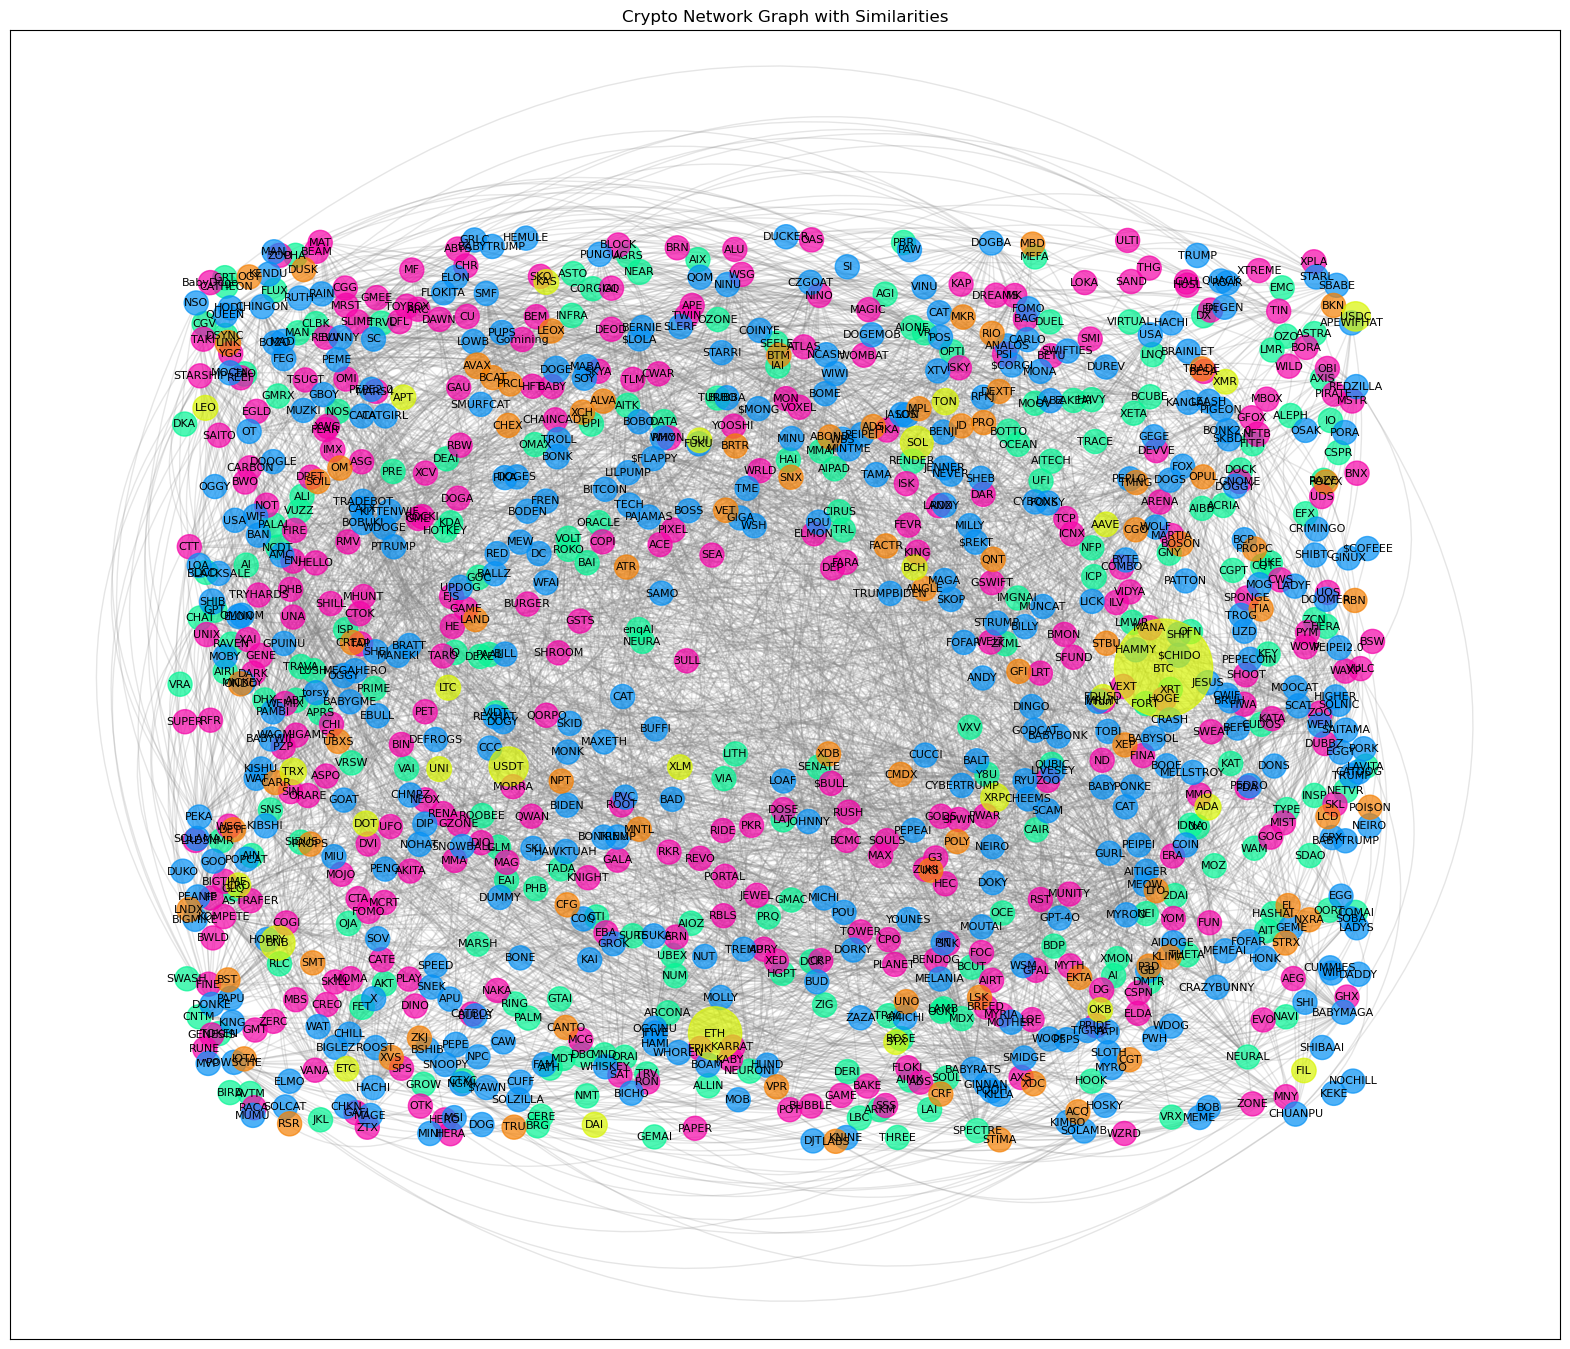

In [55]:
# Draw the graph with adjusted layout
pos = nx.spring_layout(G, k=15, iterations=1, scale=2, seed=42)  # Increase k to spread nodes

# Create labels dictionary using the symbol attribute
labels = {node: data['symbol'] for node, data in G.nodes(data=True)}


plt.figure(figsize=(20, 17))
nx.draw_networkx_nodes(G, pos, node_size=normalized_market_cap, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1, edge_color='gray', alpha=0.2, connectionstyle="Arc3,rad=0.4", arrows=True)  # Set alpha for edge opacity
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_weight='normal')
plt.title('Crypto Network Graph with Similarities')
plt.show()

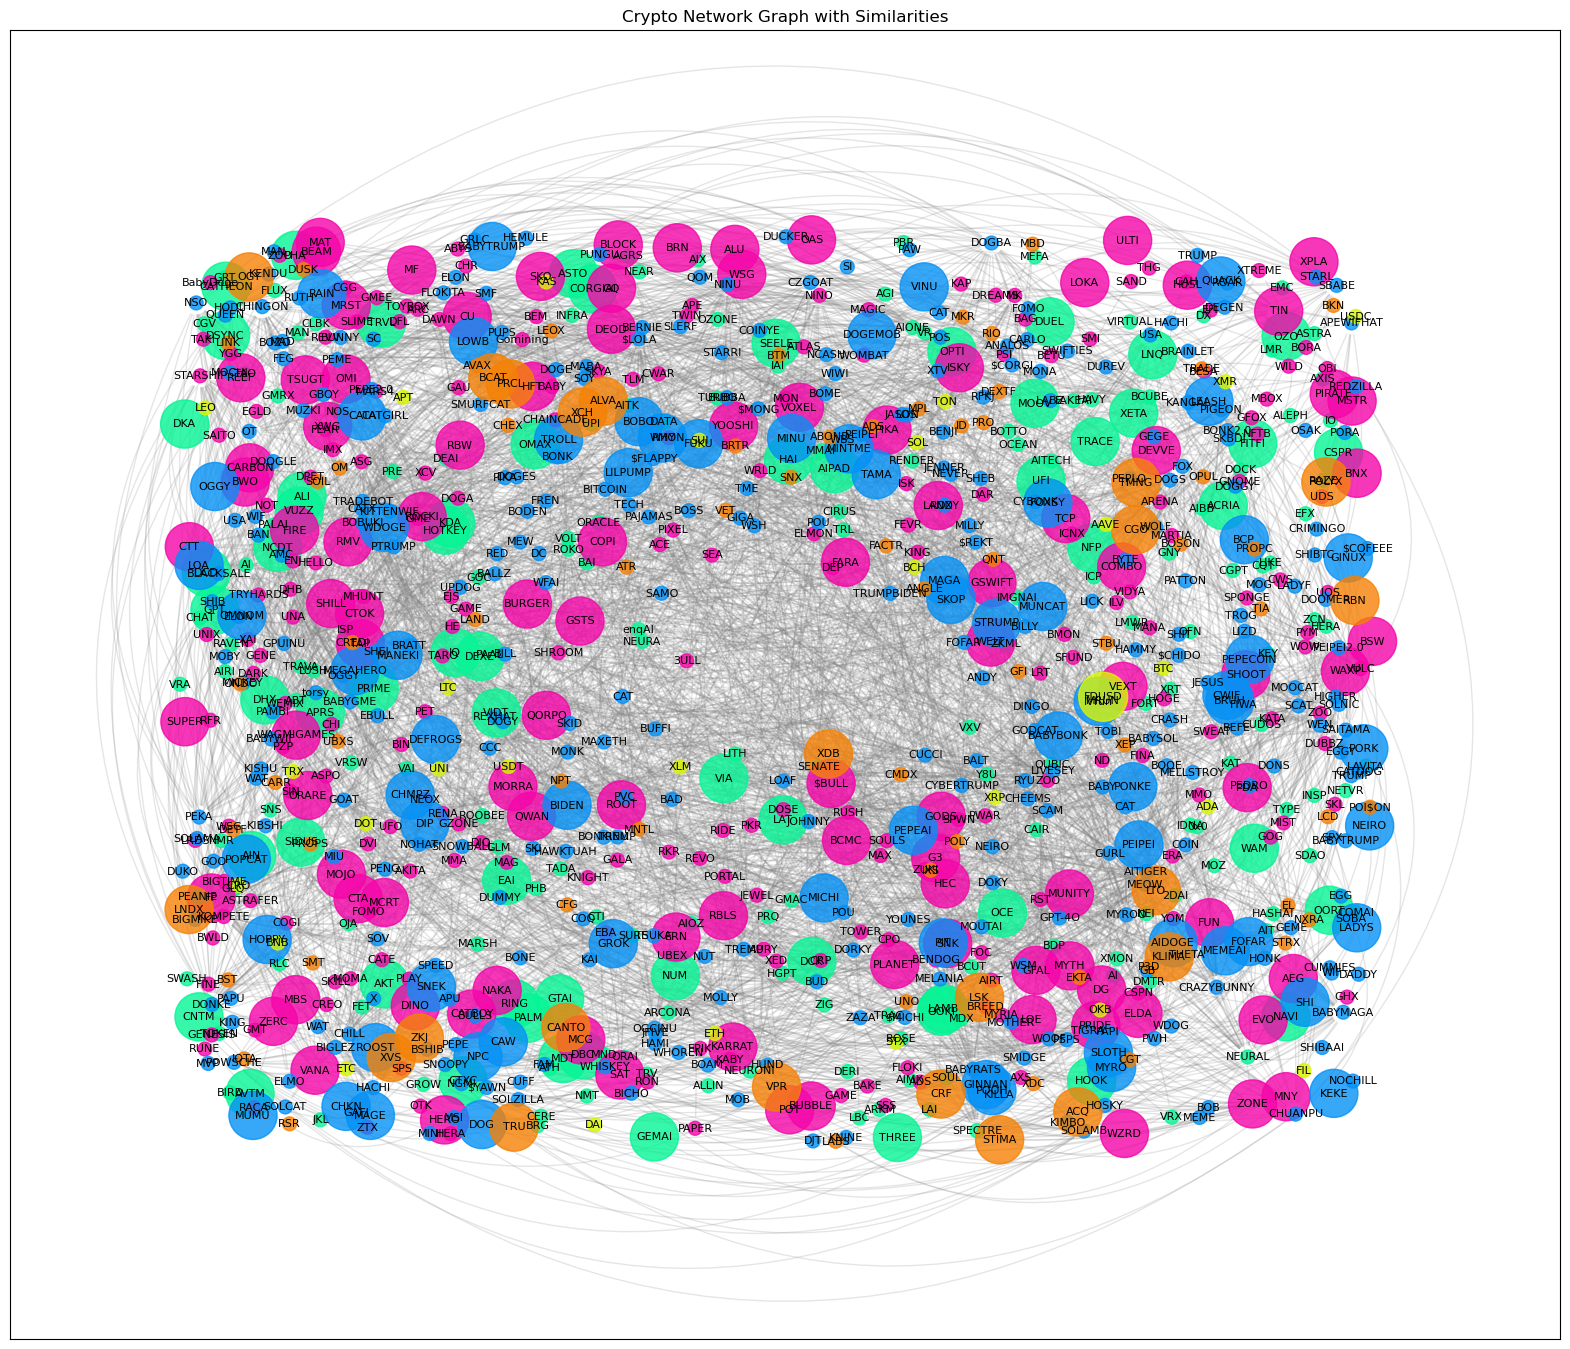

In [58]:
# Draw the graph with adjusted layout
pos = nx.spring_layout(G, k=15, iterations=1, scale=2, seed=42)  # Increase k to spread nodes

# Create labels dictionary using the symbol attribute
labels = {node: data['symbol'] for node, data in G.nodes(data=True)}


plt.figure(figsize=(20, 17))
nx.draw_networkx_nodes(G, pos, node_size=crypto_exchange_df['adjusted_market_cap'], node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1, edge_color='gray', alpha=0.2, connectionstyle="Arc3,rad=0.4", arrows=True)  # Set alpha for edge opacity
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_weight='normal')
plt.title('Crypto Network Graph with Similarities')
plt.show()

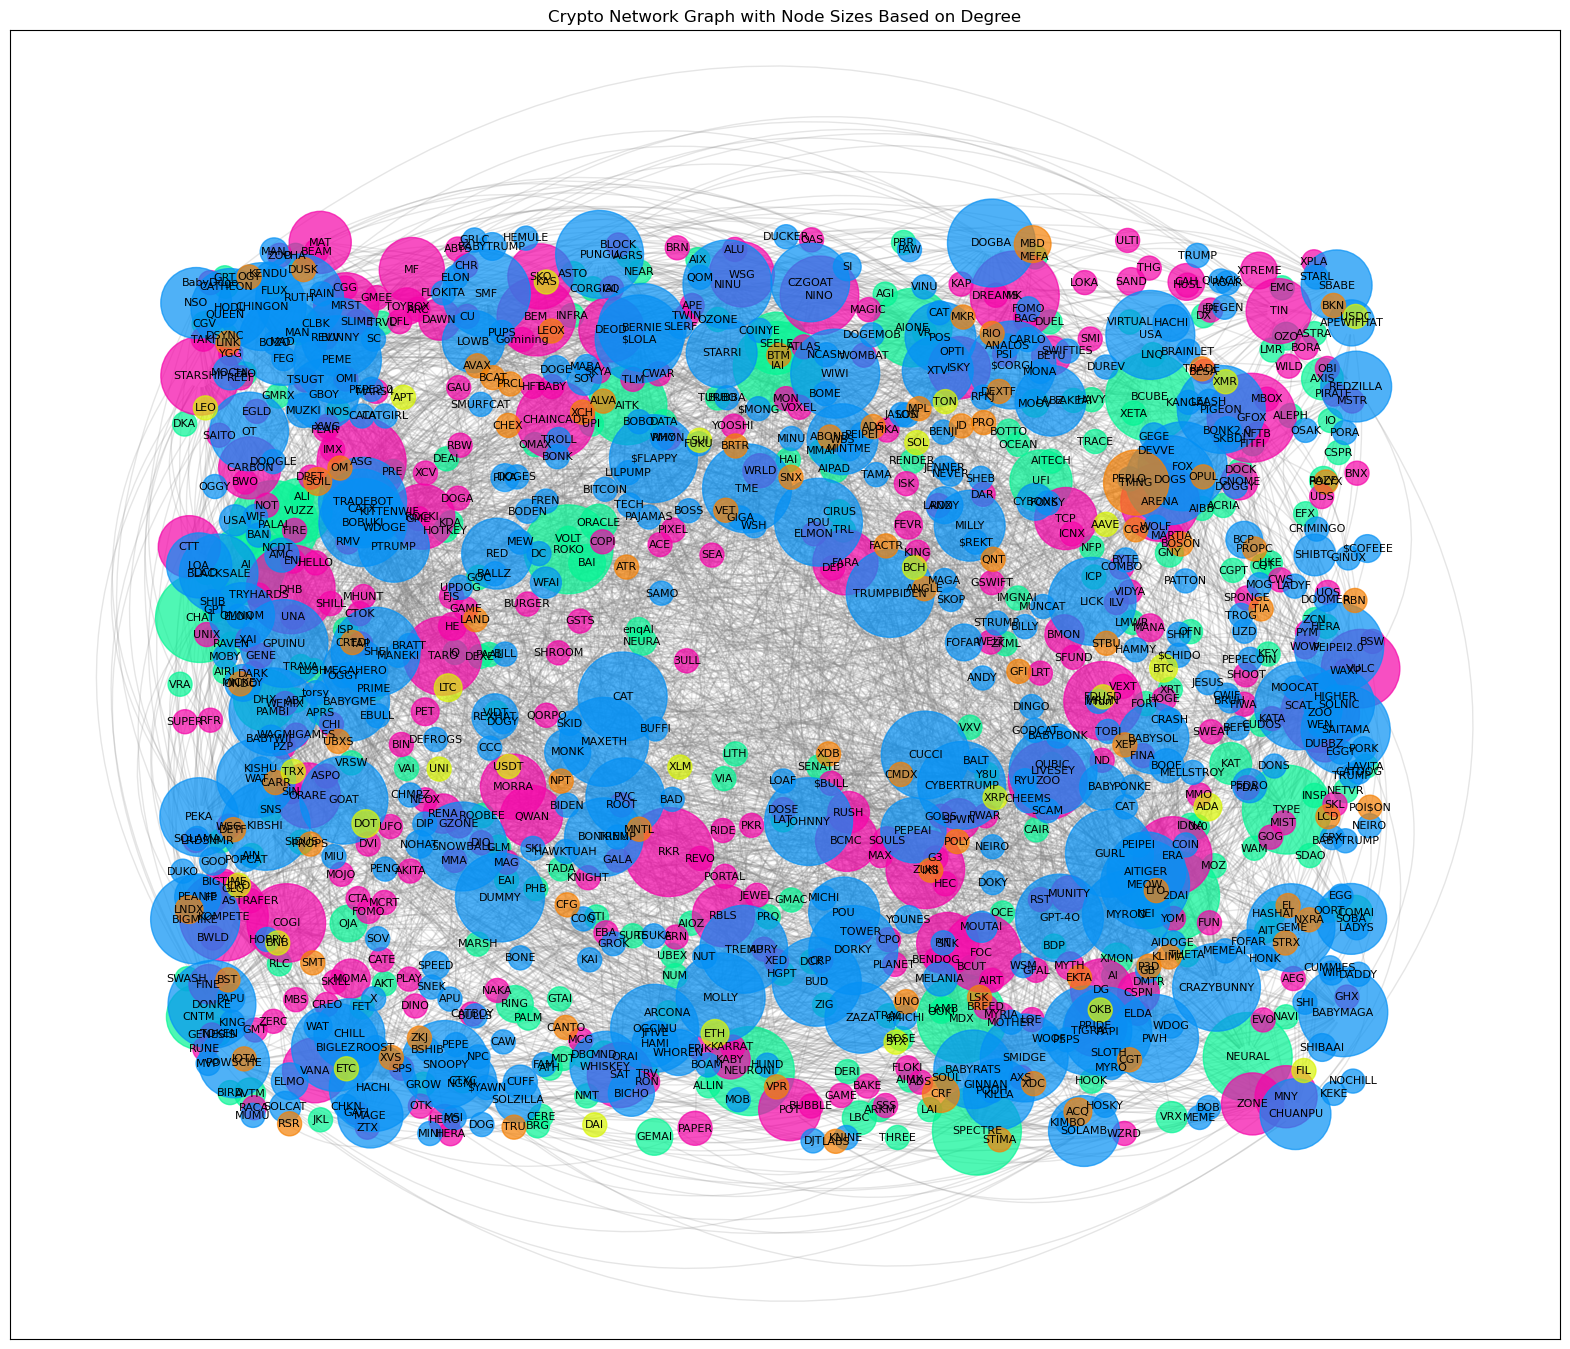

In [43]:
# Calculate node sizes based on degree
node_sizes = [300 + 100 * G.degree(node) for node in G.nodes()]

# Draw the graph with adjusted layout
pos = nx.spring_layout(G, k=15, iterations=1, scale=2, seed=42)  # Increase k to spread nodes
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]  # Scale weights for visibility

# Create labels dictionary using the symbol attribute
labels = {node: data['symbol'] for node, data in G.nodes(data=True)}

plt.figure(figsize=(20, 17))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray', alpha=0.2, connectionstyle="Arc3,rad=0.4", arrows=True)  # Set alpha for edge opacity
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_weight='normal')
plt.title('Crypto Network Graph with Node Sizes Based on Degree')
plt.show()